## Insurance claim fraud detection

### Problem Statement

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

So in this context, we will be working with some auto insurance data to demonstrate how we can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)

In [2]:
# Load the dataset
df=pd.read_csv("C:/Users/HP/anaconda3/DataScience/DataTrainedProjects/EvaluationProjects/Fraud.csv")

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
# check the shape of dataset
df.shape

(1000, 40)

In [5]:
# check the datatypes of dataset
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
# dropping this column which is having lot of missing values
df.drop('_c39',axis=1,inplace=True)

# we can drop certain columns which doesnt make any impact on our model building
df.drop(['policy_number','incident_location'],axis=1,inplace=True)

In [7]:
# grouping numerical variables
num_vars = [y for y in df.columns if df[y].dtypes != 'O']
df[num_vars]

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,431289,0,0,20,1,0,1,87200,17440,8720,61040,2006
996,285,41,1000,1436.79,0,608177,70900,0,23,1,2,3,108480,18080,18080,72320,2015
997,130,34,500,1383.49,3000000,442797,35100,0,4,3,2,3,67500,7500,7500,52500,1996
998,458,62,2000,1356.92,5000000,441714,0,0,2,1,0,1,46980,5220,5220,36540,1998


In [8]:
# checking for any null values present in the dataset
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [9]:
# checking the value_counts of the certain features having symbol ?
print(df['collision_type'].value_counts())
print(df['property_damage'].value_counts())
print(df['police_report_available'].value_counts())


Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64
?      360
NO     338
YES    302
Name: property_damage, dtype: int64
?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


In [10]:
# replacing the character ? with mean of the feature

df['collision_type']=df['collision_type'].replace(
    to_replace='?', 
    value='Rear Collision', 
    inplace=False, 
    limit=None, 
    regex=False, method='pad')
df['property_damage']=df['property_damage'].replace(
    to_replace='?', 
    value='No', 
    inplace=False, 
    limit=None, 
    regex=False, method='pad')
df['police_report_available']=df['police_report_available'].replace(
    to_replace='?', 
    value='No', 
    inplace=False, 
    limit=None, 
    regex=False, method='pad')

In [11]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,No,0,0,No,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,No,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


For some of the policies, policy bind date > incident date. so these claims are considered fraudulant cases and wont recieve any claimed amount

In [12]:
import datetime

df['policy_year'] = pd.to_datetime(df.policy_bind_date,format='%d-%m-%Y')
df['incident_year'] = pd.to_datetime(df.incident_date, format='%d-%m-%Y')
df['policy_year'] = df['policy_year'].dt.strftime('%Y')
df['incident_year'] = df['incident_year'].dt.strftime('%Y')


In [13]:
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

# grouping categorical variables 
cat_vars = [x for x in df.columns if df[x].dtypes == 'O']
df[cat_vars]
cat_vars.remove('policy_year')

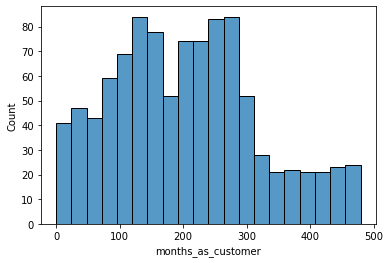

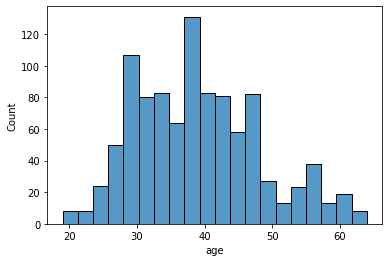

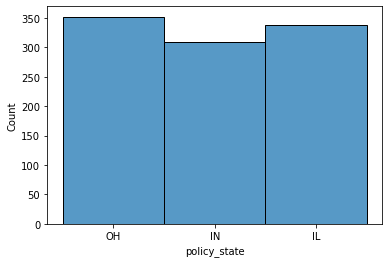

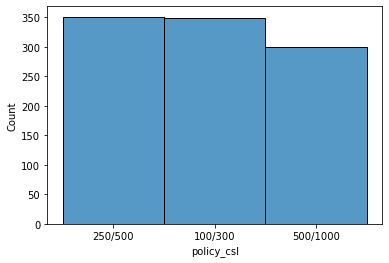

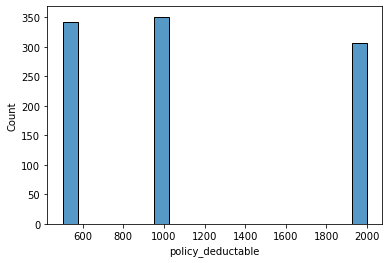

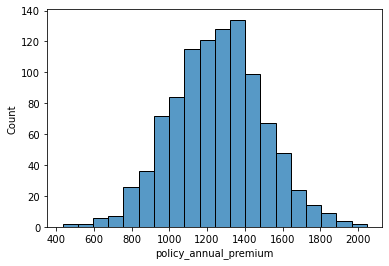

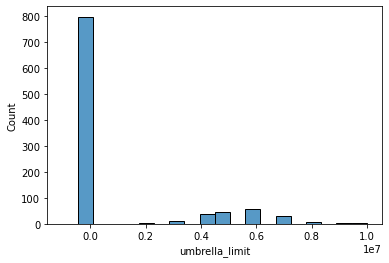

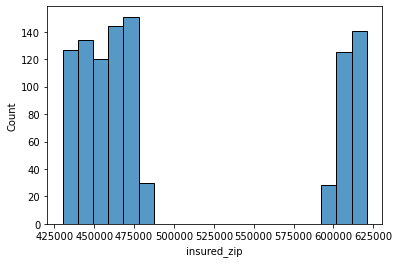

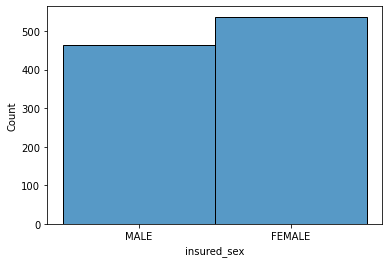

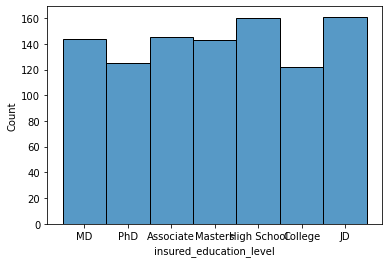

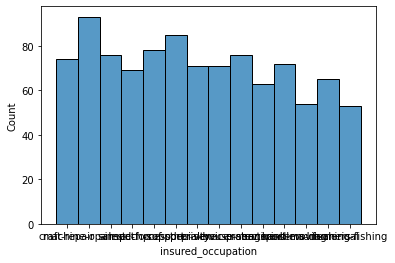

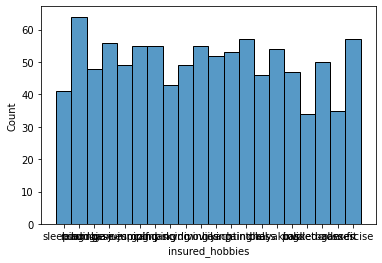

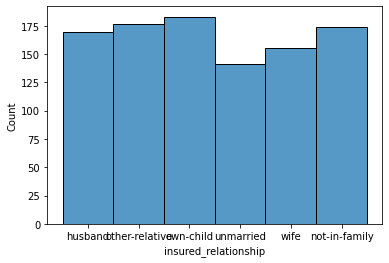

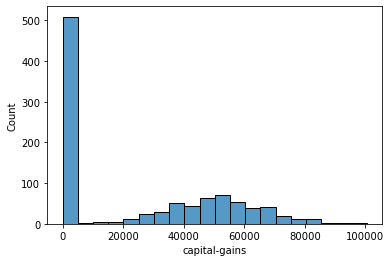

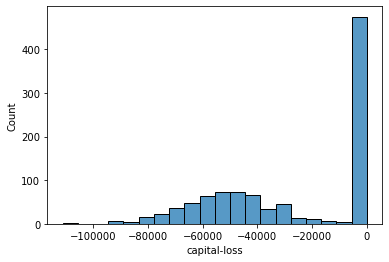

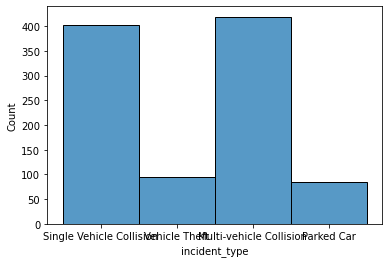

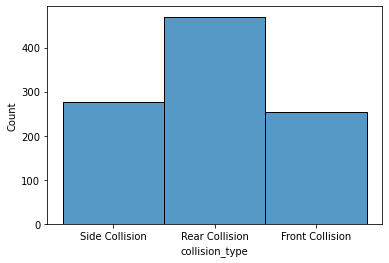

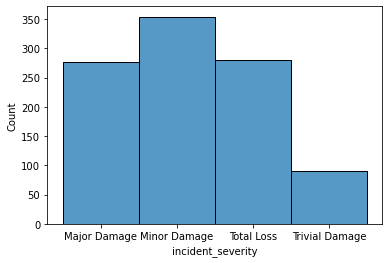

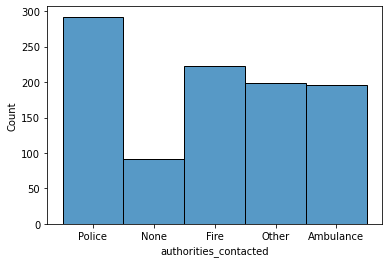

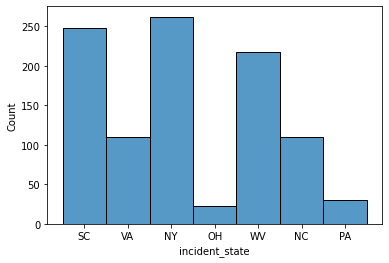

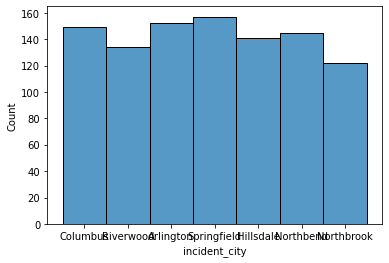

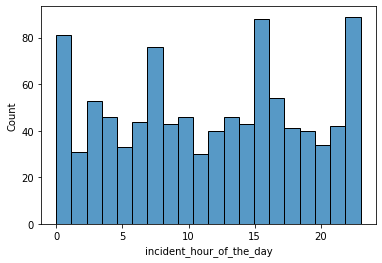

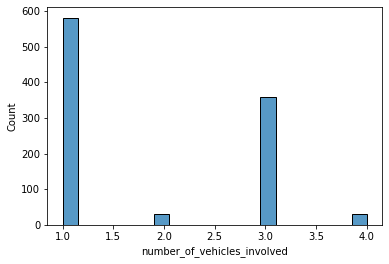

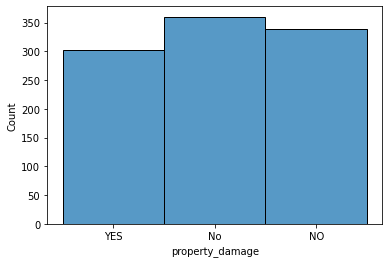

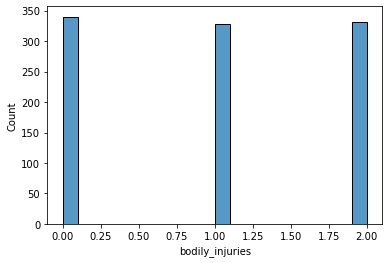

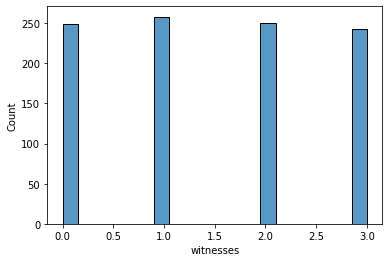

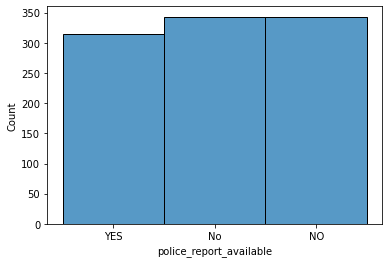

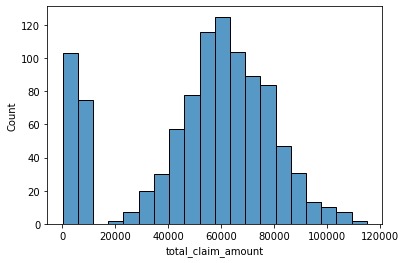

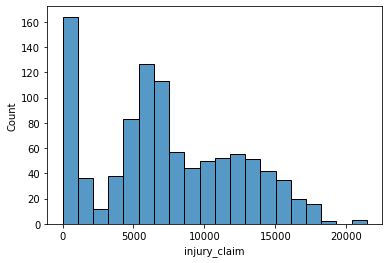

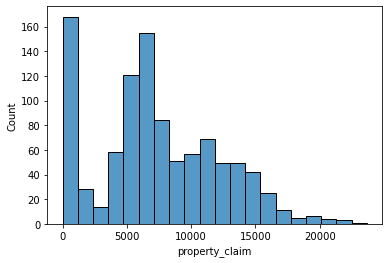

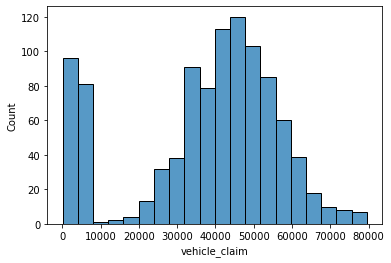

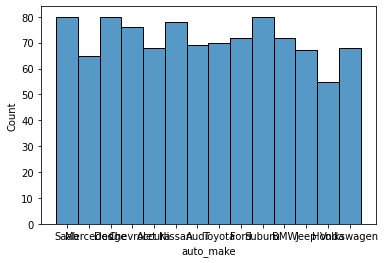

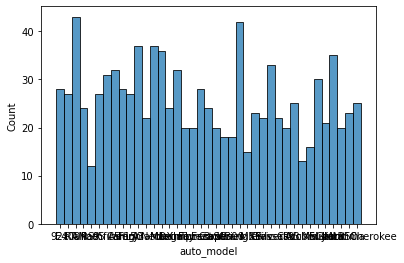

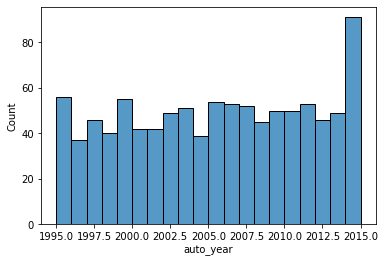

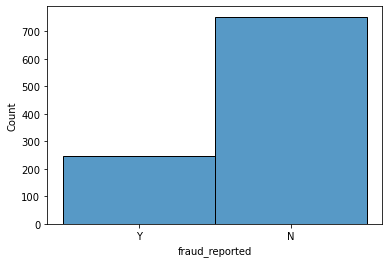

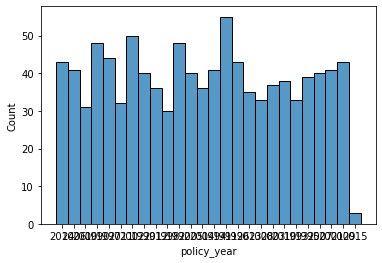

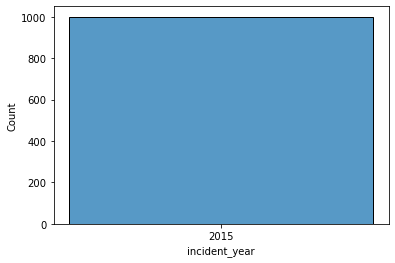

In [14]:
# checking for any skewness in the dataset

for i in df.columns:
    sns.histplot(df[i],bins=20)
    plt.show()

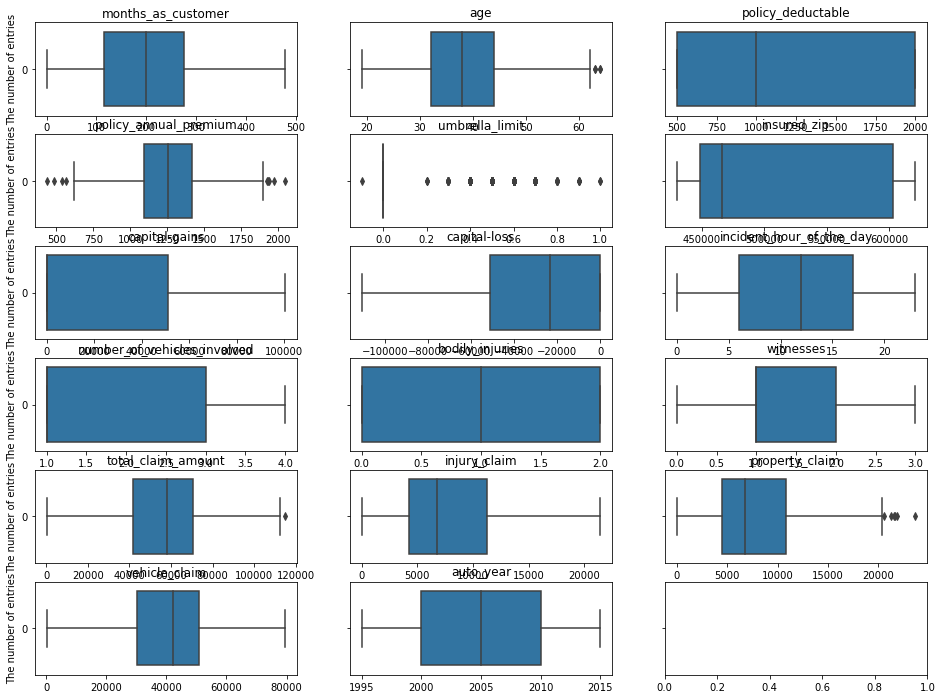

In [15]:
# check for outliers

def boxplots_custom(dataset, columns_list, rows, cols, subtitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
#     fig.subtitle(subtitle,y=0.63, size=14)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=num_vars, rows=6, cols=3, subtitle='Boxplots before deleting outliers')

###### There are less number of outliers in the columns property claim,Total_claim_amount,capital_loss,capital_gain,Age. so we will treat it to remove them in further steps

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


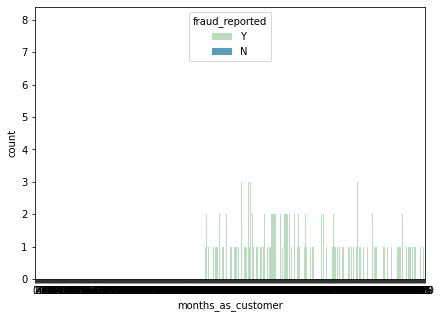

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


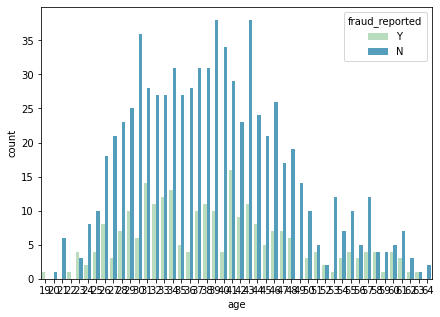

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


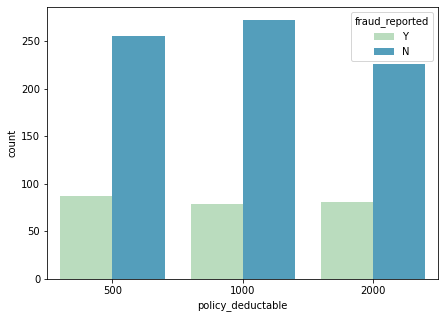

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


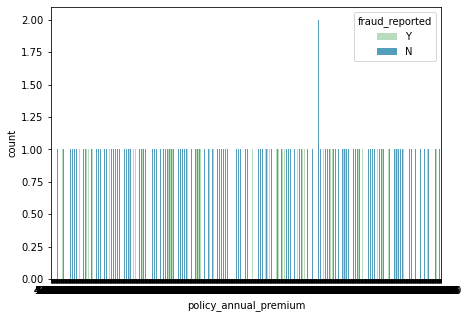

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


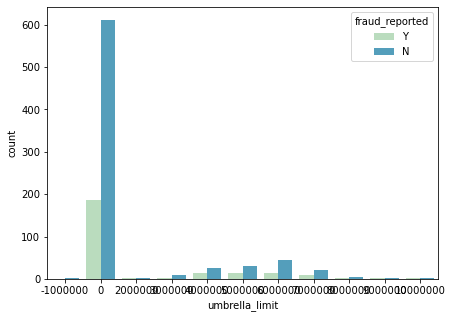

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


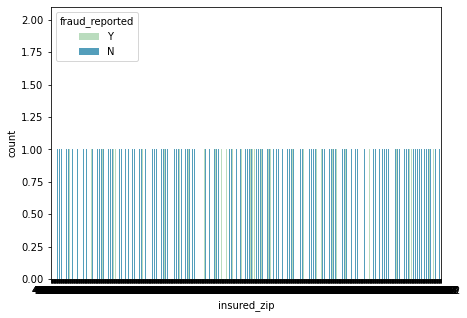

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


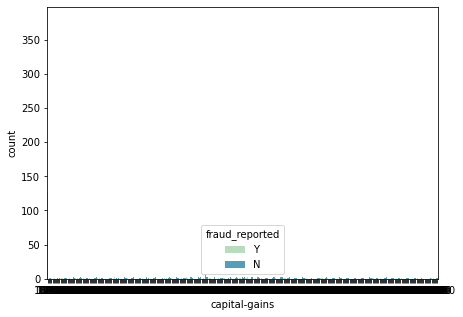

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


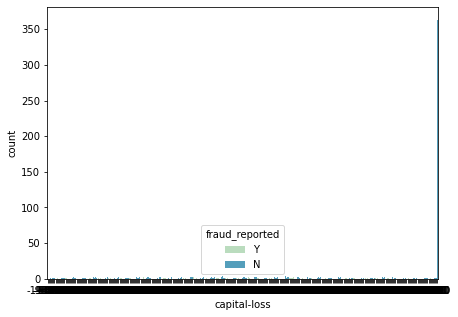

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


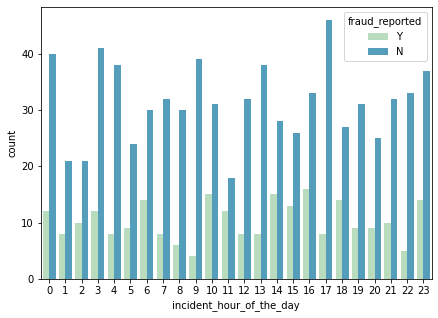

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


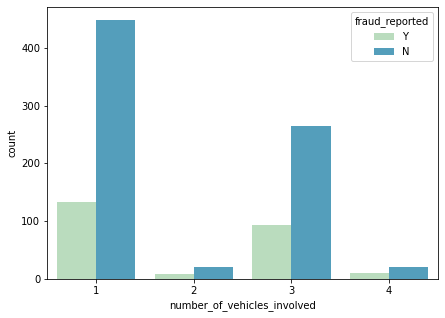

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


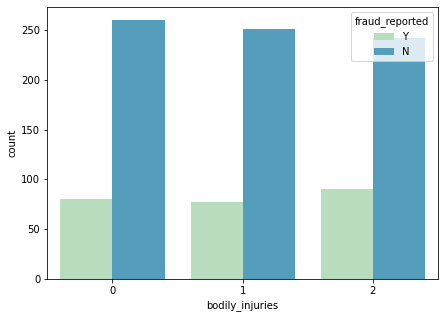

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


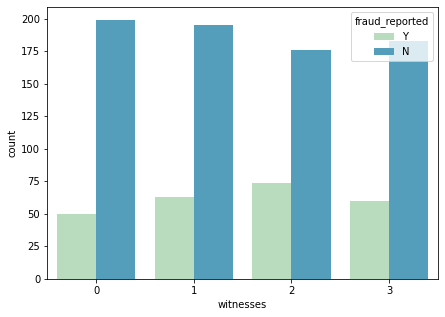

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


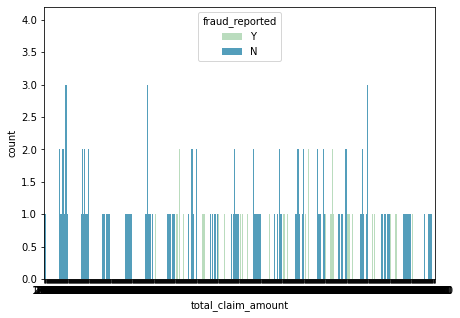

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


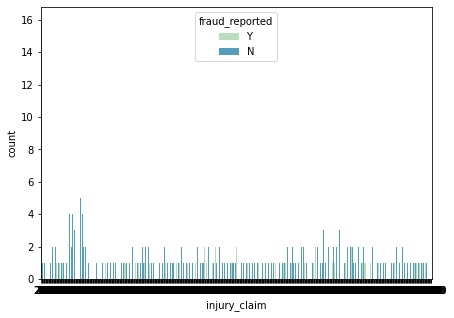

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


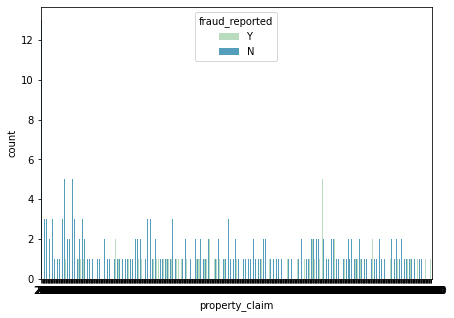

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


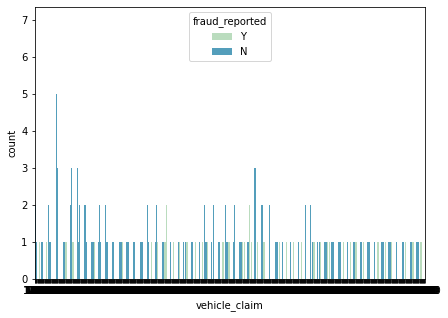

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


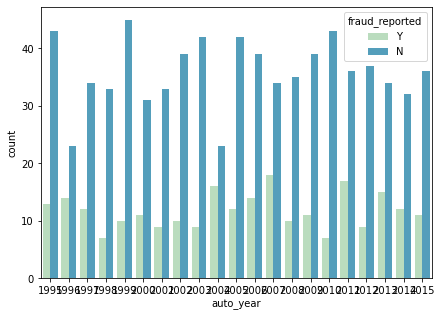

In [16]:
# plotting countplot

for i in num_vars:
    plt.figure(figsize=(7,5))
    sns.countplot(df[i],hue=df['fraud_reported'],palette='GnBu')
    plt.show()

* There are more number of genuine customers than the fraudulant cases of age group of 19-62
* The deductible is the amount of money you pay before the insurer starts covering the cost of medical expenses . so deductable count is around 200 for each of the cases
for non-fraudulant cases and it is 55-60 in counts for fraudulant cases
* An umbrella policy kicks in when you reach the limit on the underlying liability coverage in a homeowners, renters, condo or auto policy. so count is more for non-fraudulant cases than fraud one's
* most of the incident has happened at 3 AM & 5 PM for genuine cases & most of the incident happened at 6 AM & 6 PM for fraud cases
* Most of the incidents has only one vehicle involved for fraudulant & genuine cases. next comes 3 vehicles
* Most of the body injuries has happened equally and there are no specific incident which caused injury to allover the body
* There are equal number of witnesses not more than 3 for an incident happened
* There are many vehicle claims,property claims and more in count for genuine cases
* Most of the Genuine cases incident happened 2005,2010,2012 as well as most of the fraud cases reported in the year 2004- 2007 & so on

<AxesSubplot:xlabel='age', ylabel='months_as_customer'>

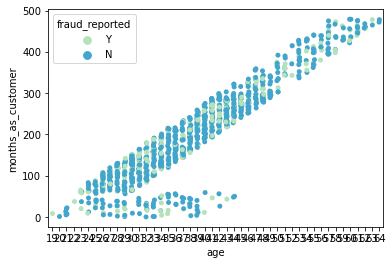

In [17]:
sns.stripplot(x='age',y='months_as_customer',data=df,jitter=True,hue='fraud_reported',palette='GnBu')

According to analysis, we have insured person of the age from 19 to 62 partnered with Banker for a minimum of 0 months to maximum of 500 months
* So there are more number of Genuine cases who claim insurance and the months as a customer will gradually increases with the age of the insured suggesting
that the insured is a Genuine customer & will not make any fraud claims

<AxesSubplot:xlabel='months_as_customer', ylabel='total_claim_amount'>

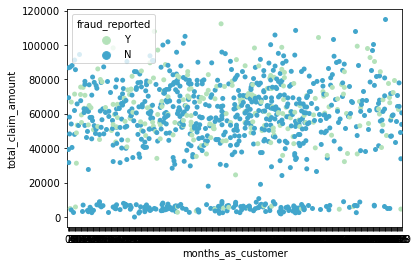

In [19]:
sns.stripplot(x='months_as_customer',y='total_claim_amount',data=df,jitter=True,hue='fraud_reported',palette='GnBu')

The total_claim_amount claimed by the insurer as a customer ranges from 40000 to 10000 which includes both fraud as well as genuine customers.
Another observation is that many of the Genuine customer as not yet claimed any amount but still pays to banker to be insured.

<AxesSubplot:xlabel='months_as_customer', ylabel='injury_claim'>

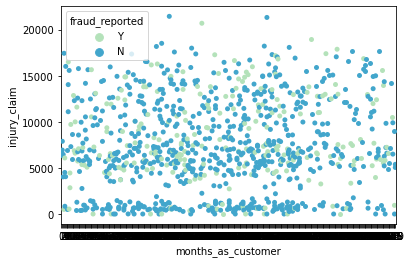

In [20]:
sns.stripplot(x='months_as_customer',y='injury_claim',data=df,jitter=True,hue='fraud_reported',palette='GnBu')

If you like to see the age of the insured who has claimed injury claim, the figures is in the range 5000 to 20000 which are potentially Genuine insurer. there are still considerable number of fraud claims also which will get rejected by the banker if they are found fraud

<AxesSubplot:xlabel='months_as_customer', ylabel='property_claim'>

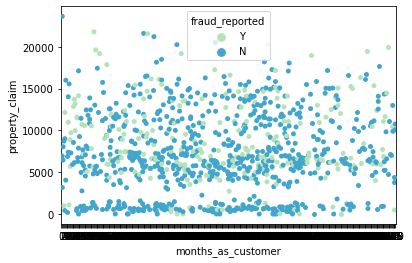

In [21]:
sns.stripplot(x='months_as_customer',y='property_claim',data=df,jitter=True,hue='fraud_reported',palette='GnBu')

Property claims claimed by insurer ranges from 5000- 15000 in majority. and some minority genuine & fraud cases also claim beyond that 
* Another observation from the plot is some of the genuine cases have not at all claimed property claim & wishes to be permanently insured customer
* Even the insurer have passed months of time with the current Insurer,they still be considered as fraud because of the fraudulant records

<AxesSubplot:xlabel='months_as_customer', ylabel='vehicle_claim'>

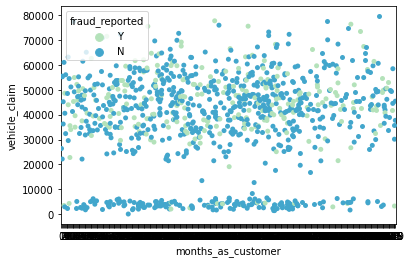

In [22]:
sns.stripplot(x='months_as_customer',y='vehicle_claim',data=df,jitter=True,hue='fraud_reported',palette='GnBu')

Vehicle claims are claimemd from Rs 30000-70000 which includes both genuine & fraud cases. which will be clearly segregated later

<AxesSubplot:xlabel='incident_type', ylabel='injury_claim'>

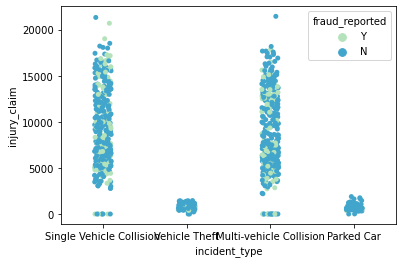

In [23]:
sns.stripplot(x='incident_type',y='injury_claim',data=df,jitter=True,hue='fraud_reported',palette='GnBu')

* Most of the fraud & genuine insurer claimed to be a victim of Single vehicle collision & Multi vehicle collision
* Vehicle theft are claimed in less numbers by insurer & all of them are genuine cases 
* claims amount ranges from 5000- 20000

<AxesSubplot:xlabel='total_claim_amount', ylabel='injury_claim'>

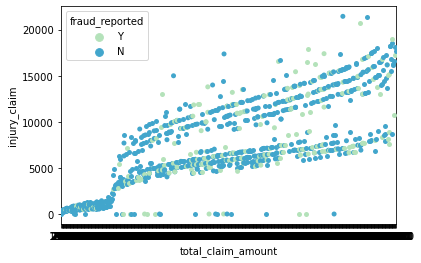

In [24]:
sns.stripplot(x='total_claim_amount',y='injury_claim',data=df,jitter=True,hue='fraud_reported',palette='GnBu')

* most of the injury claim is in the range of 5k-15k propbably it has added to the total_claim_amount. and has nothing to do with it for individual analysis

<AxesSubplot:xlabel='total_claim_amount', ylabel='property_claim'>

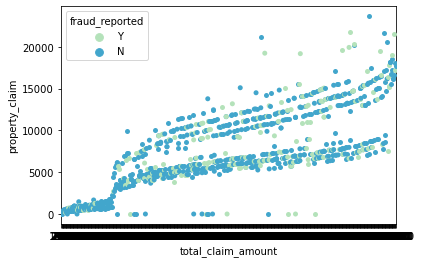

In [25]:
sns.stripplot(x='total_claim_amount',y='property_claim',data=df,jitter=True,hue='fraud_reported',palette='GnBu')

<AxesSubplot:xlabel='vehicle_claim', ylabel='total_claim_amount'>

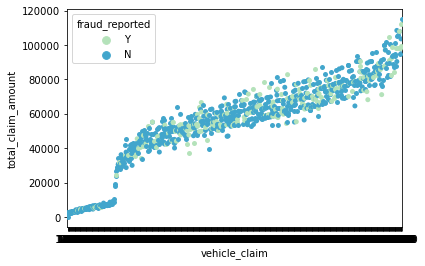

In [26]:
sns.stripplot(x='vehicle_claim',y='total_claim_amount',data=df,jitter=True,hue='fraud_reported',palette='GnBu')

There are equally same number of Fraud & Genuine cases which are claimed to add up to total_claim_amount

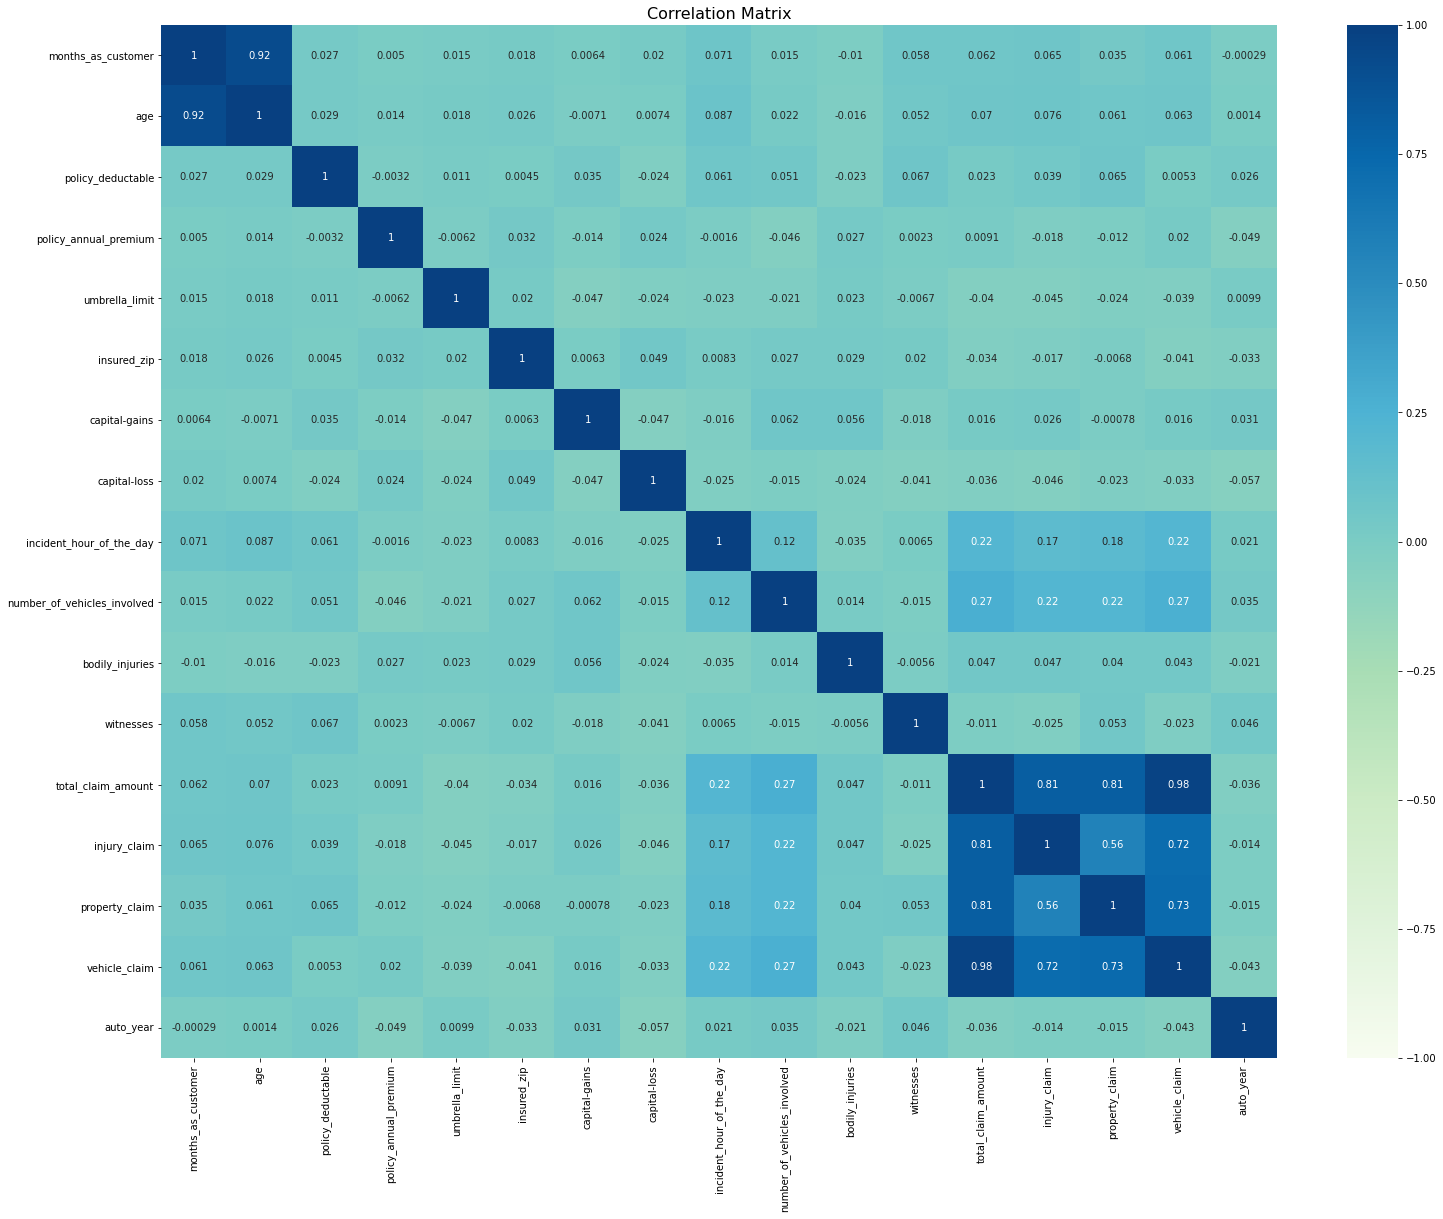

In [27]:
fx, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,19))
ax.set_title('Correlation Matrix', fontsize=16)

sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='GnBu', annot=True)
plt.show()

In later steps we will drop incident_year,umbrella_limit which has no impact on our model building

##### Label Encoder

In [28]:
#Labelizing categorical variables

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[cat_vars]=df[cat_vars].apply(lb.fit_transform)

In [29]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_year,incident_year
0,328,48,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1,2014,0
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,1,0,0,1,5070,780,780,3510,8,12,2007,1,2006,0
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0,2000,0
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,1,1,2,0,63400,6340,6340,50720,3,34,2014,1,1990,0
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0,2014,0


In [30]:
# deleting outliers
Q1 = df[num_vars].quantile(0.25)
Q3 = df[num_vars].quantile(0.75)
IQR = Q3 - Q1
print('Here we will get IQR for each column\n',IQR)

df= df[~((df[num_vars] < (Q1 - 1.5 * IQR)) |(df[num_vars] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(df.shape)

Here we will get IQR for each column
 months_as_customer                160.5000
age                                12.0000
policy_deductable                1500.0000
policy_annual_premium             326.0875
umbrella_limit                      0.0000
insured_zip                    154846.5000
capital-gains                   51025.0000
capital-loss                    51500.0000
incident_hour_of_the_day           11.0000
number_of_vehicles_involved         2.0000
bodily_injuries                     2.0000
witnesses                           1.0000
total_claim_amount              28780.0000
injury_claim                     7010.0000
property_claim                   6440.0000
vehicle_claim                   20530.0000
auto_year                          10.0000
dtype: float64


(782, 37)

In [31]:
x=df.drop(['fraud_reported','incident_year'],axis=1)
y=df['fraud_reported']

In [32]:
y.value_counts()

0    600
1    182
Name: fraud_reported, dtype: int64

##### Re-sampling

In [34]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
# splitting the dataset in to train and test split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)
#combine them back for resampling
train_data = pd.concat([X_train, y_train], axis=1)
# separate minority and majority classes
negative = train_data[train_data.fraud_reported==0]
positive = train_data[train_data.fraud_reported==1]
# upsample minority
pos_upsampled = resample(negative,
 replace=True, # sample with replacement
 n_samples=len(positive), # match number in majority class
 random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([positive, pos_upsampled])
# check new class counts
upsampled.fraud_reported.value_counts()

1    121
0    121
Name: fraud_reported, dtype: int64

In [35]:
x=upsampled.drop('fraud_reported',axis=1)
y=upsampled['fraud_reported']

In [36]:
#Removing skewness
x.skew()
from sklearn.preprocessing import power_transform
x[num_vars]=power_transform(x[num_vars],method='yeo-johnson')

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [37]:
#import al the necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV

# split train test set
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [38]:
y_test.value_counts()

1    37
0    36
Name: fraud_reported, dtype: int64

##### Scaling the dataset

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_x=scaler.fit_transform(x_train)
standardized_xtest=scaler.fit_transform(x_test)
df_standardized = pd.DataFrame(data=standardized_x)
df_standardized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1.483472,1.274350,1.177148,-1.337536,0.175259,0.185339,0.0,0.0,1.017912,-1.566317,1.100230,-1.062586,-0.146943,-0.925287,0.936429,0.808150,-1.315540,-0.948130,1.212183,-1.010363,1.185891,0.578724,-0.831038,1.258515,1.167532,1.263542,-1.157170,-0.852670,-2.244758,-2.302782,-0.264128,-1.248599,-1.182129,-1.524980,0.866787
1,0.311401,0.315690,1.177148,1.216629,1.351270,-0.565805,0.0,0.0,1.017912,-0.563637,-0.907207,-0.157460,0.981845,1.047953,-1.013892,-1.115474,1.284767,-0.948130,1.212183,-1.010363,0.131072,1.098460,1.188325,-0.022744,1.167532,0.492107,-1.157170,0.627373,-0.039046,1.023462,0.650314,1.353583,-0.029383,1.101066,-1.055255
2,0.559876,0.537007,-0.035889,1.216629,-1.110973,-1.094503,0.0,0.0,-0.982403,-0.062297,1.602090,-1.243611,0.981845,1.138901,0.936429,-1.115474,1.284767,-0.948130,-0.757614,0.396928,-0.923747,0.310598,0.562766,-0.022744,1.167532,0.492107,0.035280,0.838775,0.169549,1.354442,0.725756,0.643897,0.680000,0.372302,0.866787
3,-1.852453,-2.283754,1.177148,-0.060454,0.175259,0.682677,0.0,0.0,-0.982403,0.940384,0.347441,0.928691,-0.146943,-0.925287,-1.036064,0.808150,-0.015386,0.113022,-0.757614,-0.072169,0.658482,0.310598,-0.831038,-1.304004,-1.234781,-1.332571,0.035280,0.268204,1.028414,-0.152693,0.167486,-1.485161,0.413981,0.193422,0.592210
4,-0.317530,-0.503881,1.177148,-1.337536,0.175259,-0.840282,0.0,0.0,-0.982403,-0.062297,0.347441,-0.519510,-1.275731,1.086060,-1.046926,-1.115474,1.284767,1.174175,0.555584,1.335122,-0.396337,0.841108,1.535219,-0.022744,1.167532,1.263542,1.227729,0.821919,1.168973,1.137061,0.386074,1.353583,-0.029383,0.015848,-0.231522


In [40]:
models= [('lr',LogisticRegression()),('rfc',RandomForestClassifier()),('etc',ExtraTreesClassifier()),('bgc',BaggingClassifier()),
        ('gbc',GradientBoostingClassifier()),('dtc',DecisionTreeClassifier()),('knn',KNeighborsClassifier()),
        ('bnb',BernoulliNB()),('svc',SVC())]

##### Cross validation

In [41]:
#function to find crossValidation score of different models

def basic_model_selection(x,y,cross_folds,model):
    scores=[]
    names = []
    for i,j in model:
        cv_scores = cross_val_score(j, x, y, cv=cross_folds,n_jobs=-1)
        scores.append(cv_scores)
        names.append(i)
    for k in range(len(scores)):
        print(names[k],scores[k].mean())

In [42]:
basic_model_selection(standardized_x,y_train,10,models)

lr 0.6919117647058824
rfc 0.7573529411764705
etc 0.7099264705882353
bgc 0.7922794117647058
gbc 0.8636029411764706
dtc 0.7746323529411765
knn 0.6334558823529413
bnb 0.7514705882352941
svc 0.6863970588235294


we have got good scores for GBC & ETC. so we will consider the same to work further

In [43]:
param_test1 = {'n_estimators':range(20,81,10)}
gbc_search= GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='accuracy',n_jobs=4,cv=5)
gbc_search.fit(standardized_x,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 81, 10)},
             scoring='accuracy')

In [44]:
gbc_search.best_params_, gbc_search.best_score_

({'n_estimators': 20}, 0.503030303030303)

In [45]:
gbc= GradientBoostingClassifier(max_depth=8,
                                max_features='sqrt',
                                min_samples_leaf=50,
                                min_samples_split=500,
                                random_state=10,
                                subsample=0.8,n_estimators=20)

In [46]:
gbc.fit(standardized_x,y_train)
pred_gbc=gbc.predict(standardized_xtest)

In [47]:
print(accuracy_score(pred_gbc,y_test))
print(classification_report(pred_gbc,y_test))
confusion_matrix(y_test,pred_gbc)

0.4931506849315068
              precision    recall  f1-score   support

           0       1.00      0.49      0.66        73
           1       0.00      0.00      0.00         0

    accuracy                           0.49        73
   macro avg       0.50      0.25      0.33        73
weighted avg       1.00      0.49      0.66        73



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[36,  0],
       [37,  0]], dtype=int64)

We have got 0 samples for true 1's. So we will upsample it using Smote

In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,accuracy_score,recall_score,roc_auc_score,roc_curve
sm = SMOTE(random_state=42,n_jobs=-1)
X_train, Y_train = sm.fit_resample(standardized_x,y_train)

smote = GradientBoostingClassifier(max_depth=8,
                                max_features='sqrt',
                                min_samples_leaf=50,
                                min_samples_split=500,
                                random_state=10,
                                subsample=0.8,n_estimators=20).fit(X_train,Y_train)

smote_pred = smote.predict(standardized_xtest)

# Checking accuracy
accuracy_score(y_test, smote_pred)

0.4931506849315068

In [49]:
print(accuracy_score(smote_pred,y_test))
print(classification_report(smote_pred,y_test))
confusion_matrix(y_test,smote_pred)


0.4931506849315068
              precision    recall  f1-score   support

           0       1.00      0.49      0.66        73
           1       0.00      0.00      0.00         0

    accuracy                           0.49        73
   macro avg       0.50      0.25      0.33        73
weighted avg       1.00      0.49      0.66        73



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[36,  0],
       [37,  0]], dtype=int64)

##### Hyper parameter tuning for Bagging Classifier

In [50]:
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

clf = GridSearchCV(BaggingClassifier(RandomForestClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid, scoring = 'accuracy')
clf.fit(standardized_x, y_train)

GridSearchCV(estimator=BaggingClassifier(base_estimator=RandomForestClassifier(),
                                         max_features=0.5, n_estimators=100),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]},
             scoring='accuracy')

In [51]:

smote_bgc = BaggingClassifier(n_estimators = 100, max_features = 0.5).fit(standardized_x,y_train)

smote_pred_bgc = smote_bgc.predict(standardized_xtest)

# Checking accuracy
accuracy_score(y_test, smote_pred_bgc)

0.7671232876712328

In [52]:
print(accuracy_score(smote_pred_bgc,y_test))
print(classification_report(smote_pred_bgc,y_test))
confusion_matrix(y_test,smote_pred_bgc)


0.7671232876712328
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        39
           1       0.73      0.79      0.76        34

    accuracy                           0.77        73
   macro avg       0.77      0.77      0.77        73
weighted avg       0.77      0.77      0.77        73



array([[29,  7],
       [10, 27]], dtype=int64)

we have got good f1 score. so we will move on to predict the Loan status for test dataset

In [53]:
predicted_df={"Predicted Loan_Status":smote_pred_bgc,"Original Loan_Status":y_test}
predicted_df=pd.DataFrame(predicted_df)
y_test.value_counts()

1    37
0    36
Name: fraud_reported, dtype: int64

##### creating pickel file

In [54]:
import pickle
filename = 'Insurance.pkl'
pickle.dump(smote_bgc, open(filename, 'wb'))

In [55]:
loaded_model = pickle.load(open('Insurance.pkl', 'rb'))
result = loaded_model.score(standardized_xtest, y_test)
print(result*100)

76.71232876712328


In [56]:
conclusion=pd.DataFrame([loaded_model.predict(standardized_xtest)[:],y_test[:]],index=["Predicted","Original"])

In [57]:
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
Predicted,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0,1,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1
Original,1,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1,0,0,1,1,1,0,1,0,1,1,1,0,1,0,0,0,1,1,1,1,0,1,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,1,1,0,1


#### conclusion: 
we got our predicted values which are very much in sinc with the Original values.so we can get this model loaded to production. but still there is a scope for improvement of accuracy score by using the particular parameter which increases the model performance